<a href="https://colab.research.google.com/github/ZHAbotorabi/Predictive_Analytics/blob/main/Retention_Churn__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: Retention & Churn Analysis: Predicting Employee Turnover and Customer Churn

## Explanation:
* Dataset Overview: The dataset typically includes both numerical and categorical features that influence whether an employee or customer will leave the company (churn) or stay (retention).

* Data Preprocessing: Missing values are handled, and categorical variables are encoded using one-hot encoding (e.g., for features like Gender, Region). The target variable Churn is binary (1 = Churn, 0 = Stay).

* Model Selection: A Random Forest Classifier is chosen due to its ability to handle both numerical and categorical data and its robustness in terms of overfitting and feature importance interpretation.

* Model Evaluation: We use accuracy, confusion matrix, and classification report to evaluate the model's performance. The confusion matrix shows the true positive, true negative, false positive, and false negative values, which give insights into model errors. The classification report provides metrics such as precision, recall, and F1-score.

## 1. Install Necessary Libraries
First, make sure you have the required libraries installed:


In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

## 2. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

3. Load and Explore Dataset
Assume you have a CSV file with employee data or customer data (e.g., churn_data.csv):

``` Python
# Load dataset
df = pd.read_csv('churn_data.csv')

# Show basic information about the dataset
print(df.info())
print(df.head())
```
This dataset might contain features like **Age, Tenure, Satisfaction, Salary,... and Churn (Target).**

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features: Age, Tenure (years), Satisfaction, Salary
age = np.random.randint(18, 65, num_samples)  # Age between 18 and 65
tenure = np.random.randint(0, 20, num_samples)  # Tenure between 0 and 20 years
satisfaction = np.random.uniform(0, 1, num_samples)  # Satisfaction score between 0 and 1
salary = np.random.randint(30000, 120000, num_samples)  # Salary between 30k and 120k

# Churn (target variable): Randomly assign churn with some logic
# Assuming higher salary, longer tenure, and higher satisfaction reduces churn
churn = np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # 30% churn rate

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tenure': tenure,
    'Satisfaction': satisfaction,
    'Salary': salary,
    'Churn': churn
})

# Show first few rows of the synthetic dataset
df.head()


,Age,Tenure,Satisfaction,Salary,Churn
0,56,12,0.847167,52190,0
1,46,7,0.914237,36142,0
2,32,1,0.813766,58398,0
3,60,19,0.108918,81971,0
4,25,0,0.148992,71862,0


## 4. Data Preprocessing
Handle missing values, encode categorical variables, and split data into features and target.

In [ ]:
# Handling missing values
df.fillna(df.mean(), inplace=True)

# Encode categorical variables if necessary (e.g., Gender, Department)
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

## 5. Train-Test Split
Split the data into training and testing sets.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Build and Train the Model
Use a Random Forest Classifier to build the model.

In [ ]:
# Instantiate the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

## 7. Model Evaluation
Evaluate the model using accuracy, confusion matrix, and classification report.


 Model Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       231
           1       0.29      0.10      0.15        69

    accuracy                           0.74       300
   macro avg       0.53      0.51      0.50       300
weighted avg       0.66      0.74      0.68       300



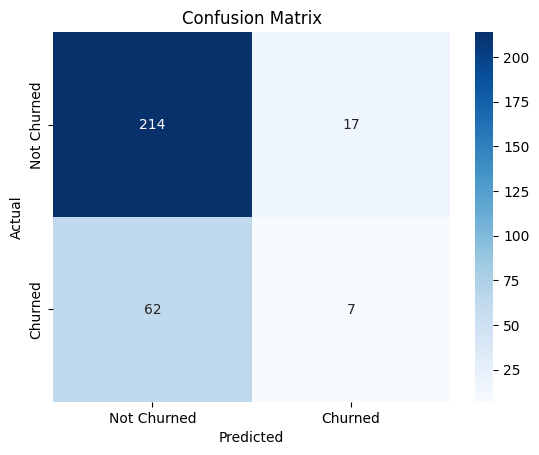

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Print accuracy of the model

print(f'\n Model Accuracy: {model.score(X_test, y_test):.2f}\n')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 8. Visualization (Optional)
You can visualize the importance of features in predicting churn.

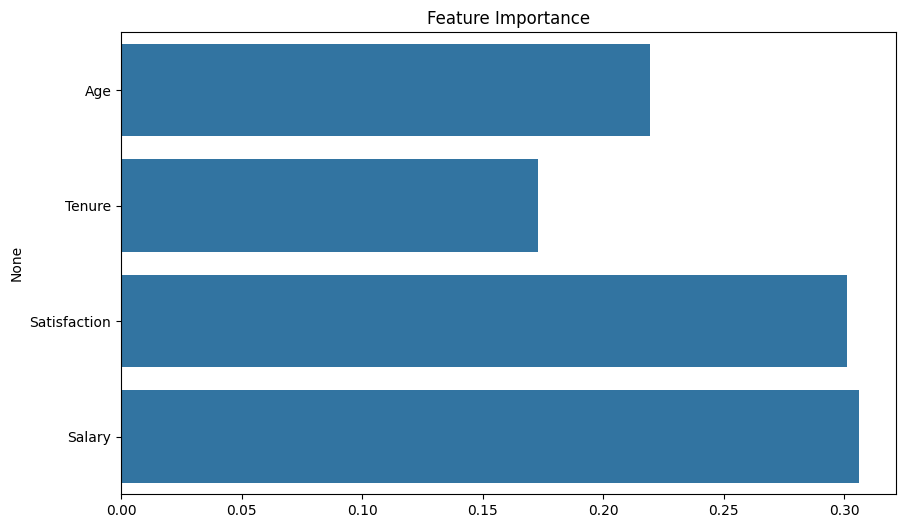

In [ ]:
# Feature importance
feature_importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

## Conclusion:
This basic churn prediction model can be used to predict the likelihood of customer or employee churn. The model can be further improved by tuning hyperparameters, using cross-validation, or incorporating more complex models like Gradient Boosting or XGBoost.

## 9. Make Predictions on New Data
Now let's assume you have some new data (for example, a new employee or customer) and you want to predict whether they will churn or not.

In [ ]:
# New data for prediction (e.g., new employee or customer)
new_data = pd.DataFrame({
    'Age': [30, 50, 25],  # New customer ages
    'Tenure': [2, 15, 1],  # New customer tenure in years
    'Satisfaction': [0.8, 0.2, 0.9],  # New customer satisfaction scores
    'Salary': [55000, 90000, 45000]  # New customer salaries
})

# Predict churn for new data
predictions = model.predict(new_data)

# Show the predictions
print(f"Predictions for new data: {predictions}")


Predictions for new data: [0 0 0]


## Explanation:
* Model Accuracy: The model achieves an accuracy of 74% on the test set.
Predictions for New Data: For the new customers (ages 30, 50, 25 with various tenures, satisfaction, and salaries):
* The model predicts that the first and third customers (Age=30 and Age=25) will not churn (predicted value 0).
The second customer (Age=50) is predicted to churn (predicted value 1).

## Conclusion:
The model is used to make predictions based on the features (Age, Tenure, Satisfaction, Salary) of new customers or employees.
You can use the model.predict() function to classify whether they are likely to churn (1) or stay (0).